## **Rocks Classification Project**

The objective of this project is to accurately classify rocks into three categories: Igneous, Metamorphic, and Sedimentary. This will be achieved using various classifiers and an ensembling method.

Data Source: The data can be accessed at https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/

Data Files:

**aggregateRockData.xlsx**: This file contains categorized and recognized data from the test phase, aggregated by rock token, and serves as the main target for modeling.

**feature_presence540.txt**: Each row represents a rock stimulus with mean feature presence ratings for 540 rock stimuli.

**trialData.csv**: Contains complete individual trial data from the main experiment. Due to occasional errors, some subjects have slightly more or fewer than 1080 trials.

The classifiers are based on the following machine learning algorithms:

1. Softmax Regression

2. Support Vector Machine

3. Random Forest Classifier

4. Ensembling Methodology

For model evaluation and performance assessment, the following metrics are used:
Accuracy

1. Precision

2. Recall

3. F1 Score


Data Description:

Rocks numbered 1 to 480 correspond to standard stimuli. Each set of 16 stimuli represents one subtype. There are 30 different rock subtypes. Token numbers 1 to 16 correspond to standard stimuli from each subtype, while tokens 17 and 18 relate to HSN stimuli from each subtype. Therefore, only token numbers 1 to 16 will be considered for our data analysis.






### **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
np.random.seed(42)


### **Loading Data**
Mapping Columns as per the data description from https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/

In [2]:
column_names = ['Rock number', 'Subtype number', 'Token number', 'Angular fragments', 'Rounded fragments', 'Straight stripes', 'Curved stripes',
                'Physical layers', 'Veins', 'Oily/shimmery texture', 'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals',
                'Sandy texture', 'Fragments (disjunctive)', 'Stripes (disjunctive)', 'Crystals (disjunctive)']

rock_df = pd.read_csv('/content/sample_data/feature_presence540.txt', sep=' ', names = column_names, header=None, skipinitialspace=True)
rock_df.head()

,Rock number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
0,1,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86,0.0,0.00
4,5,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.87,0.0,0.00


In [3]:
column_names_excel = ['Rock number', 'Category number', 'Subtype number', 'Token number', 'Stimulus Type','Frequency responded "Igneous"',
                      'Frequency responded "Metamorphic"', 'Frequency responded "Sedimentary"', 'Frequency responded "Old"', 'Frequency responded "New"',
                      'Proportion responded "Igneous"', 'Proportion responded "Metamorphic"', 'Proportion responded "Sedimentary"', 'Proportion responded "Old"']
rock_df_excel  = pd.read_excel('/content/sample_data/aggregateRockData.xlsx', names = column_names_excel, header=None)
rock_df_excel.head()

,Rock number,Category number,Subtype number,Token number,Stimulus Type,"Frequency responded ""Igneous""","Frequency responded ""Metamorphic""","Frequency responded ""Sedimentary""","Frequency responded ""Old""","Frequency responded ""New""","Proportion responded ""Igneous""","Proportion responded ""Metamorphic""","Proportion responded ""Sedimentary""","Proportion responded ""Old"""
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878


In [4]:
trial_df = pd.read_csv('/content/sample_data/trialData.csv')
trial_df.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


### **1. Initial Data Anlaysis**

In [5]:
# Still as mentioned we need to work on only till Rows 480 or Where the Rock Numbers is 480 and With onyl 11 different features that is till 14th column
rock_df = rock_df.iloc[:480, : 14]

#Shape of Dataset
print("Number of Rows", rock_df.shape[0])
print("Number of Cols", rock_df.shape[1])


Number of Rows 480
Number of Cols 14


In [ ]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock number                 480 non-null    object 
 1   Subtype number              480 non-null    object 
 2   Token number                480 non-null    object 
 3   Angular fragments           480 non-null    object 
 4   Rounded fragments           480 non-null    object 
 5   Straight stripes            480 non-null    object 
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               480 non

**Transforming the data types -** **Special Treatment for Features**

In [6]:
rock_df['Angular fragments'] = rock_df['Angular fragments'].astype('float64')
rock_df['Rounded fragments'] = rock_df['Rounded fragments'].astype('float64')
rock_df['Straight stripes'] = rock_df['Straight stripes'].astype('float64')
rock_df['Rock number'] = rock_df['Rock number'].astype('int')
rock_df['Subtype number'] = rock_df['Subtype number'].astype('int')
rock_df['Token number'] = rock_df['Token number'].astype('int')

**Merging the datasets**

In [7]:
# Since we only need Category number and Rock Number from The aggregate dataset file
rock_df = pd.merge(rock_df, rock_df_excel[['Rock number', 'Category number']], on='Rock number', how='left')
rock_df.head()

,Rock number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Category number
0,1,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,2,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,1
2,3,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,1
3,4,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,1
4,5,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,1


**Categorical and Continuous Features**:

The Subtype Number and the Category Number are the Categorical Feature and all other features are continuos since they are the probability ratio.

In [ ]:
rock_df['Category number'].unique()

array([1, 2, 3])

**Observation**

This contains 3 categories as 1 = Igneous, 2 = Metamorphic, 3 = Sedimentary

#### **Statistical Data**

In [ ]:
#Fetching the Numerical Values Statistics
rock_df.describe(include = ['float64'])

,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


In [ ]:
# Checking Null Values
rock_df.isnull().sum()

,0
Rock number,0
Subtype number,0
Token number,0
Angular fragments,0
Rounded fragments,0
Straight stripes,0
Curved stripes,0
Physical layers,0
Veins,0
Oily/shimmery texture,0


In [ ]:
#checking duplicated values
rock_df.duplicated().sum()

0

**Observation**

No Null and duplicate values present in the dataset

#### **Visualization**

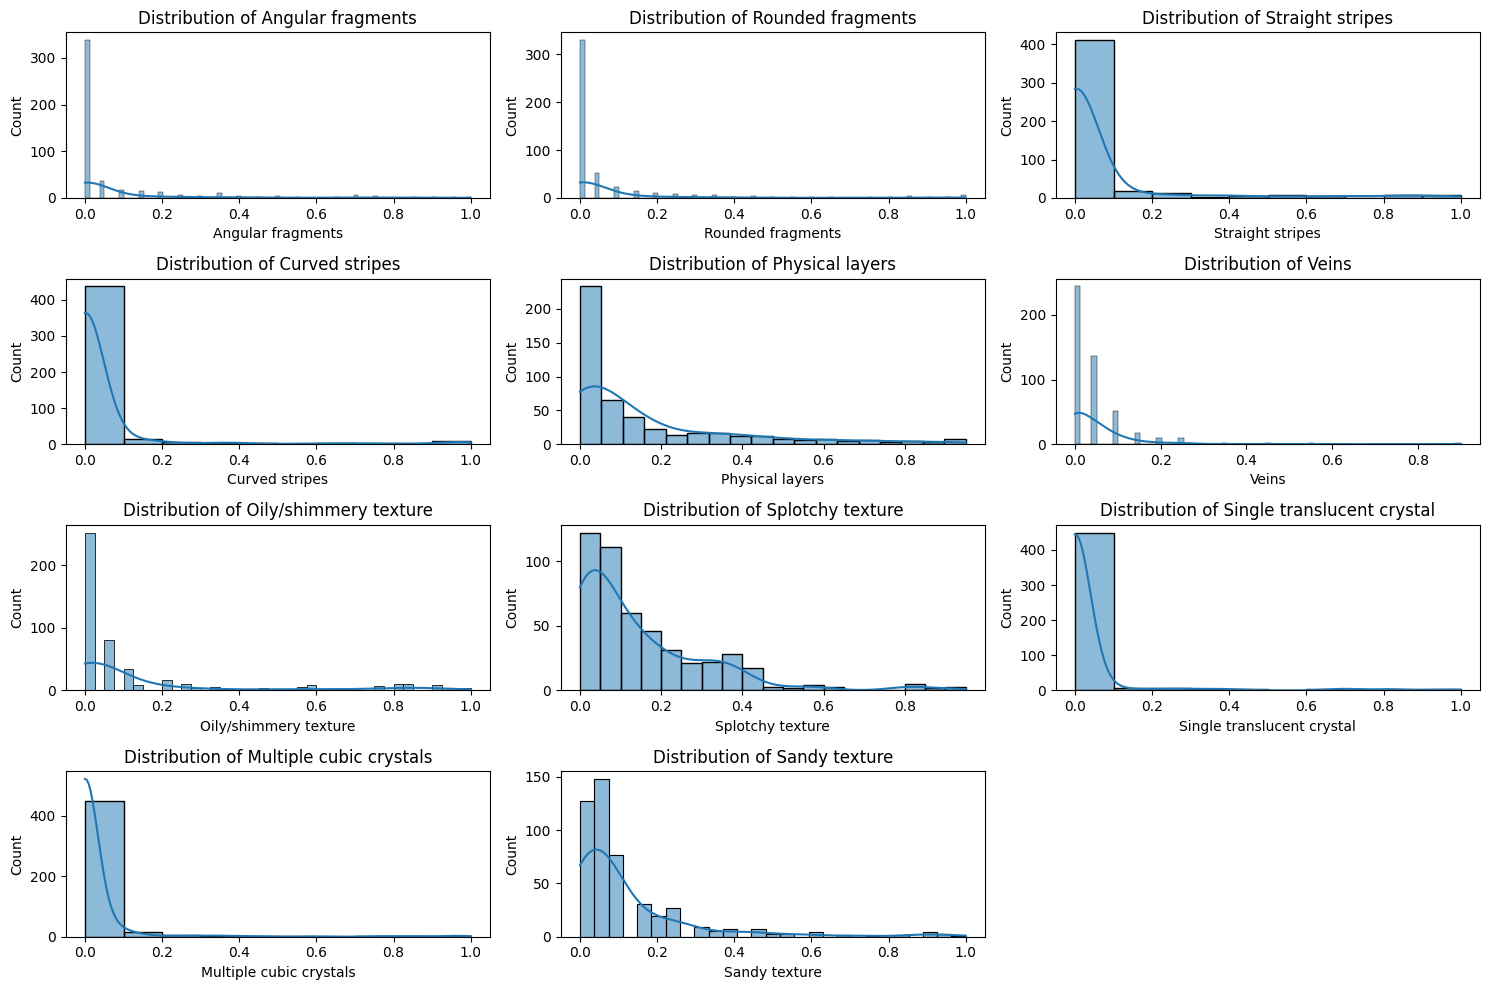

In [ ]:
def plot_hist(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15,10))

    for idx, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, idx)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_hist(df=rock_df)

Inference:

Distribution of Many features are quite different and contains probably outliers thus we will try to detect the outliers and handle them.

#### **Special Treatment: Outlier detection and Handling Using Z-score**



Z-score represents the number of standard deviations a data point is from the mean

A data point with a Z-score > 3 or < -3 is usually considered an outlier

In [8]:
#Keeping one copy of original datasets
original_df = rock_df.copy()

def detect_outliers(df, column):

    df[f'z_score_{column}'] = (df[column] - df[column].mean()) / df[column].std()

    outliers_before =  df[(df[f'z_score_{column}'] > 3) | (df[f'z_score_{column}'] < -3)]

    print(f"Number of outliers in {column}: ",len(outliers_before))

    df[column] = df[df[f'z_score_{column}'].abs() < 3][column]

for col in column_names[3:14]:
    detect_outliers(df=rock_df, column=col)


Number of outliers in Angular fragments:  20
Number of outliers in Rounded fragments:  18
Number of outliers in Straight stripes:  21
Number of outliers in Curved stripes:  16
Number of outliers in Physical layers:  10
Number of outliers in Veins:  8
Number of outliers in Oily/shimmery texture:  8
Number of outliers in Splotchy texture:  10
Number of outliers in Single translucent crystal:  13
Number of outliers in Multiple cubic crystals:  9
Number of outliers in Sandy texture:  13


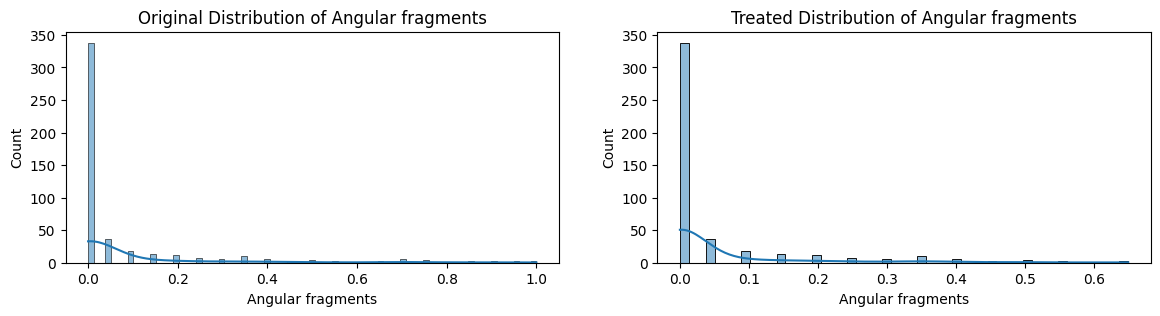

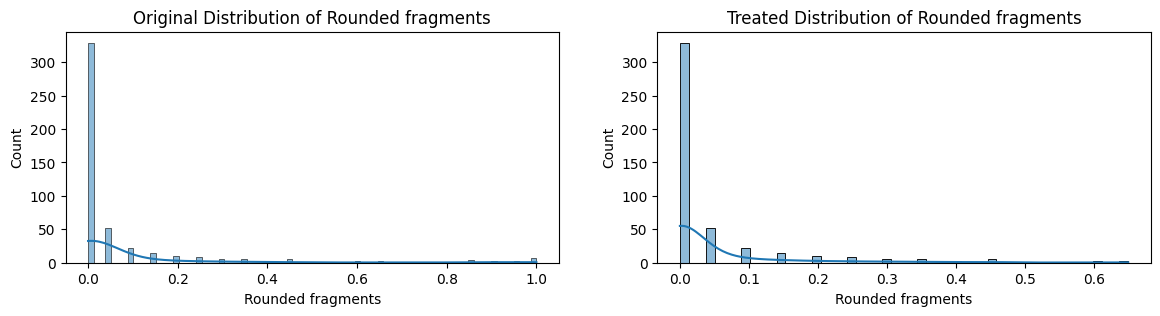

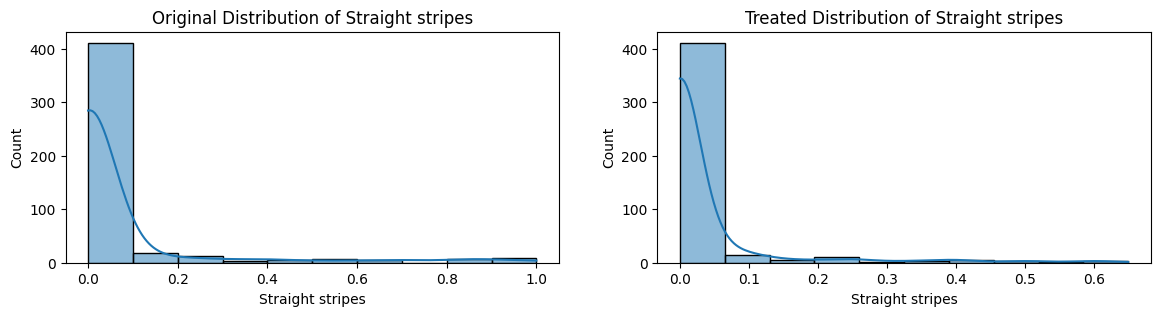

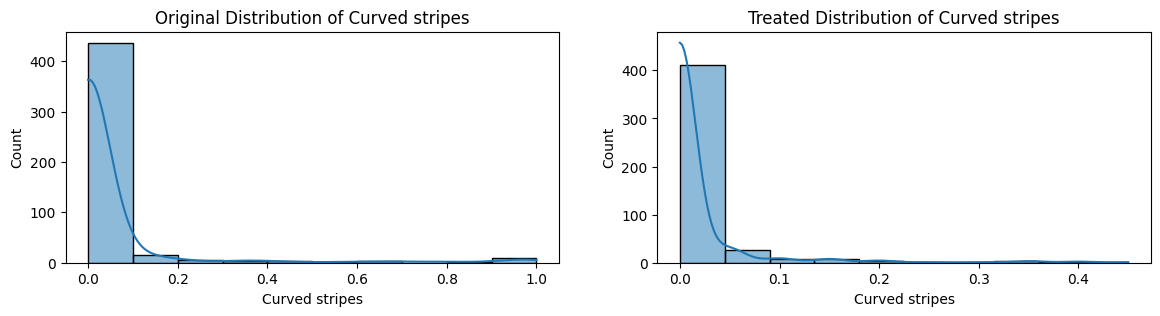

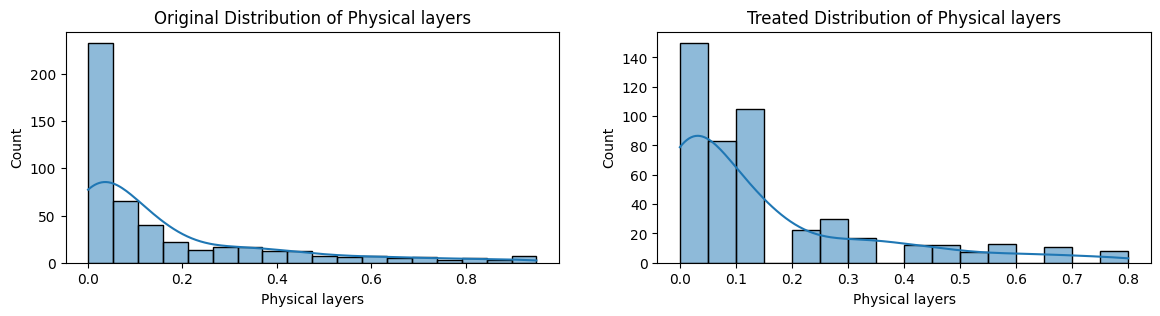

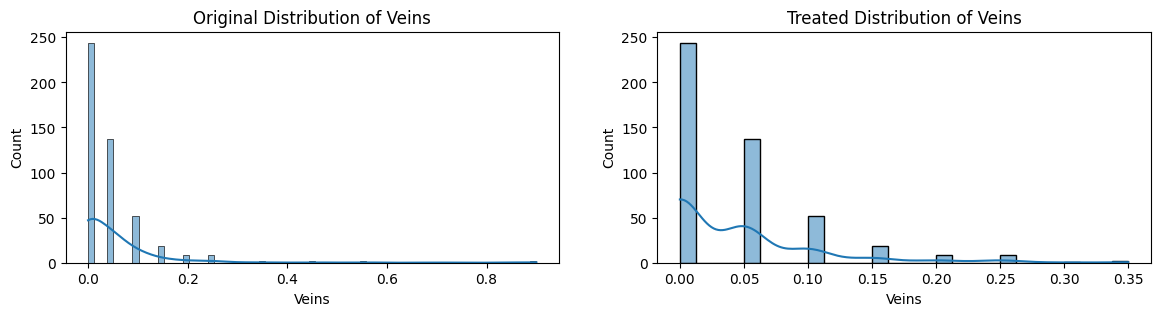

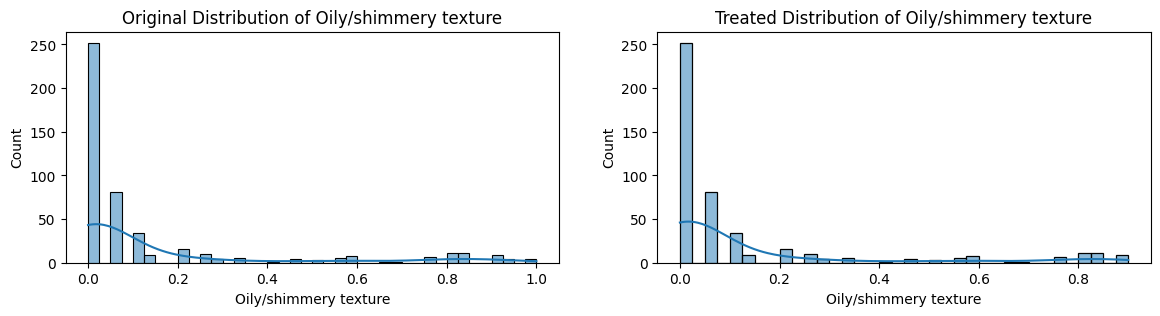

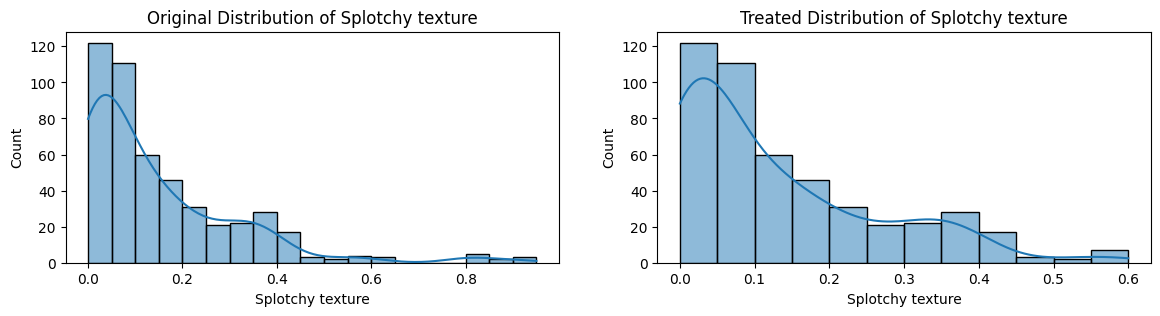

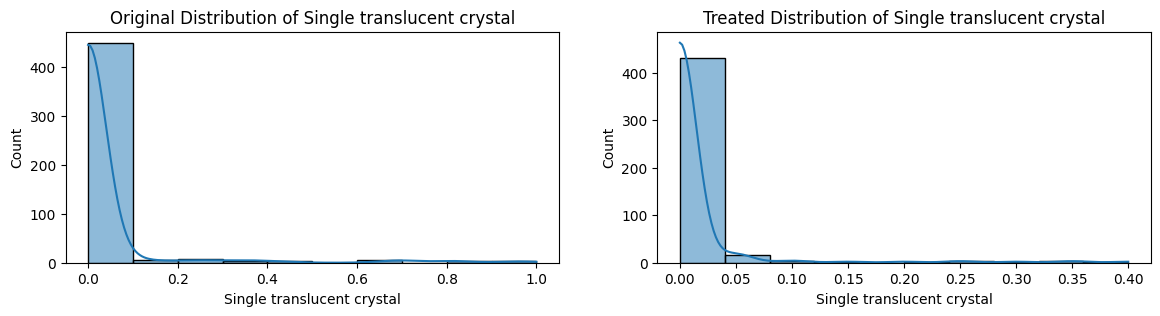

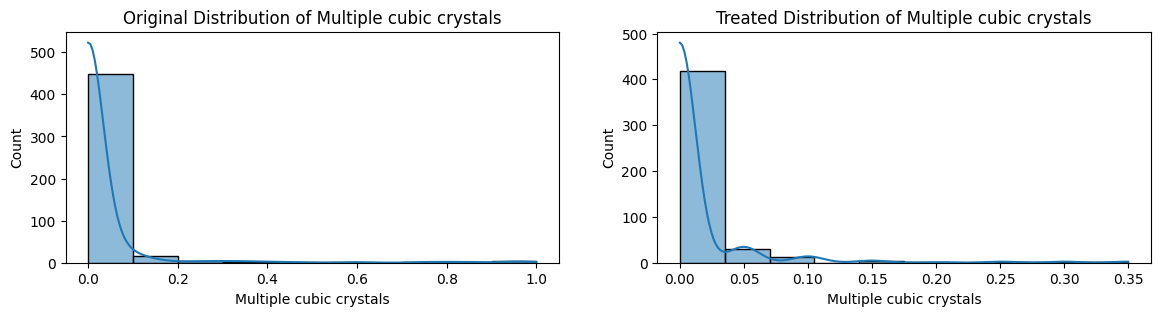

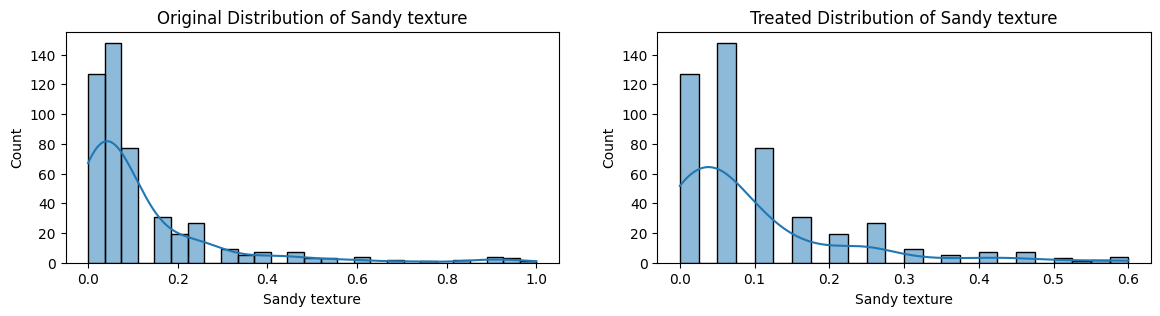

In [ ]:
# Outlier Handling
def compare_distributions(original_df, df_handled, column):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))
        # Original distribution
        sns.histplot(data=original_df, x=column, kde=True, ax=ax1)
        ax1.set_title(f'Original Distribution of {column}')

        # Treated distribution
        sns.histplot(data=df_handled, x=column, kde=True, ax=ax2)
        ax2.set_title(f'Treated Distribution of {column}')

        plt.show()

for col in column_names[3:14]:
    compare_distributions(original_df, rock_df, col)

**Plotting Box Plot For Original DF**

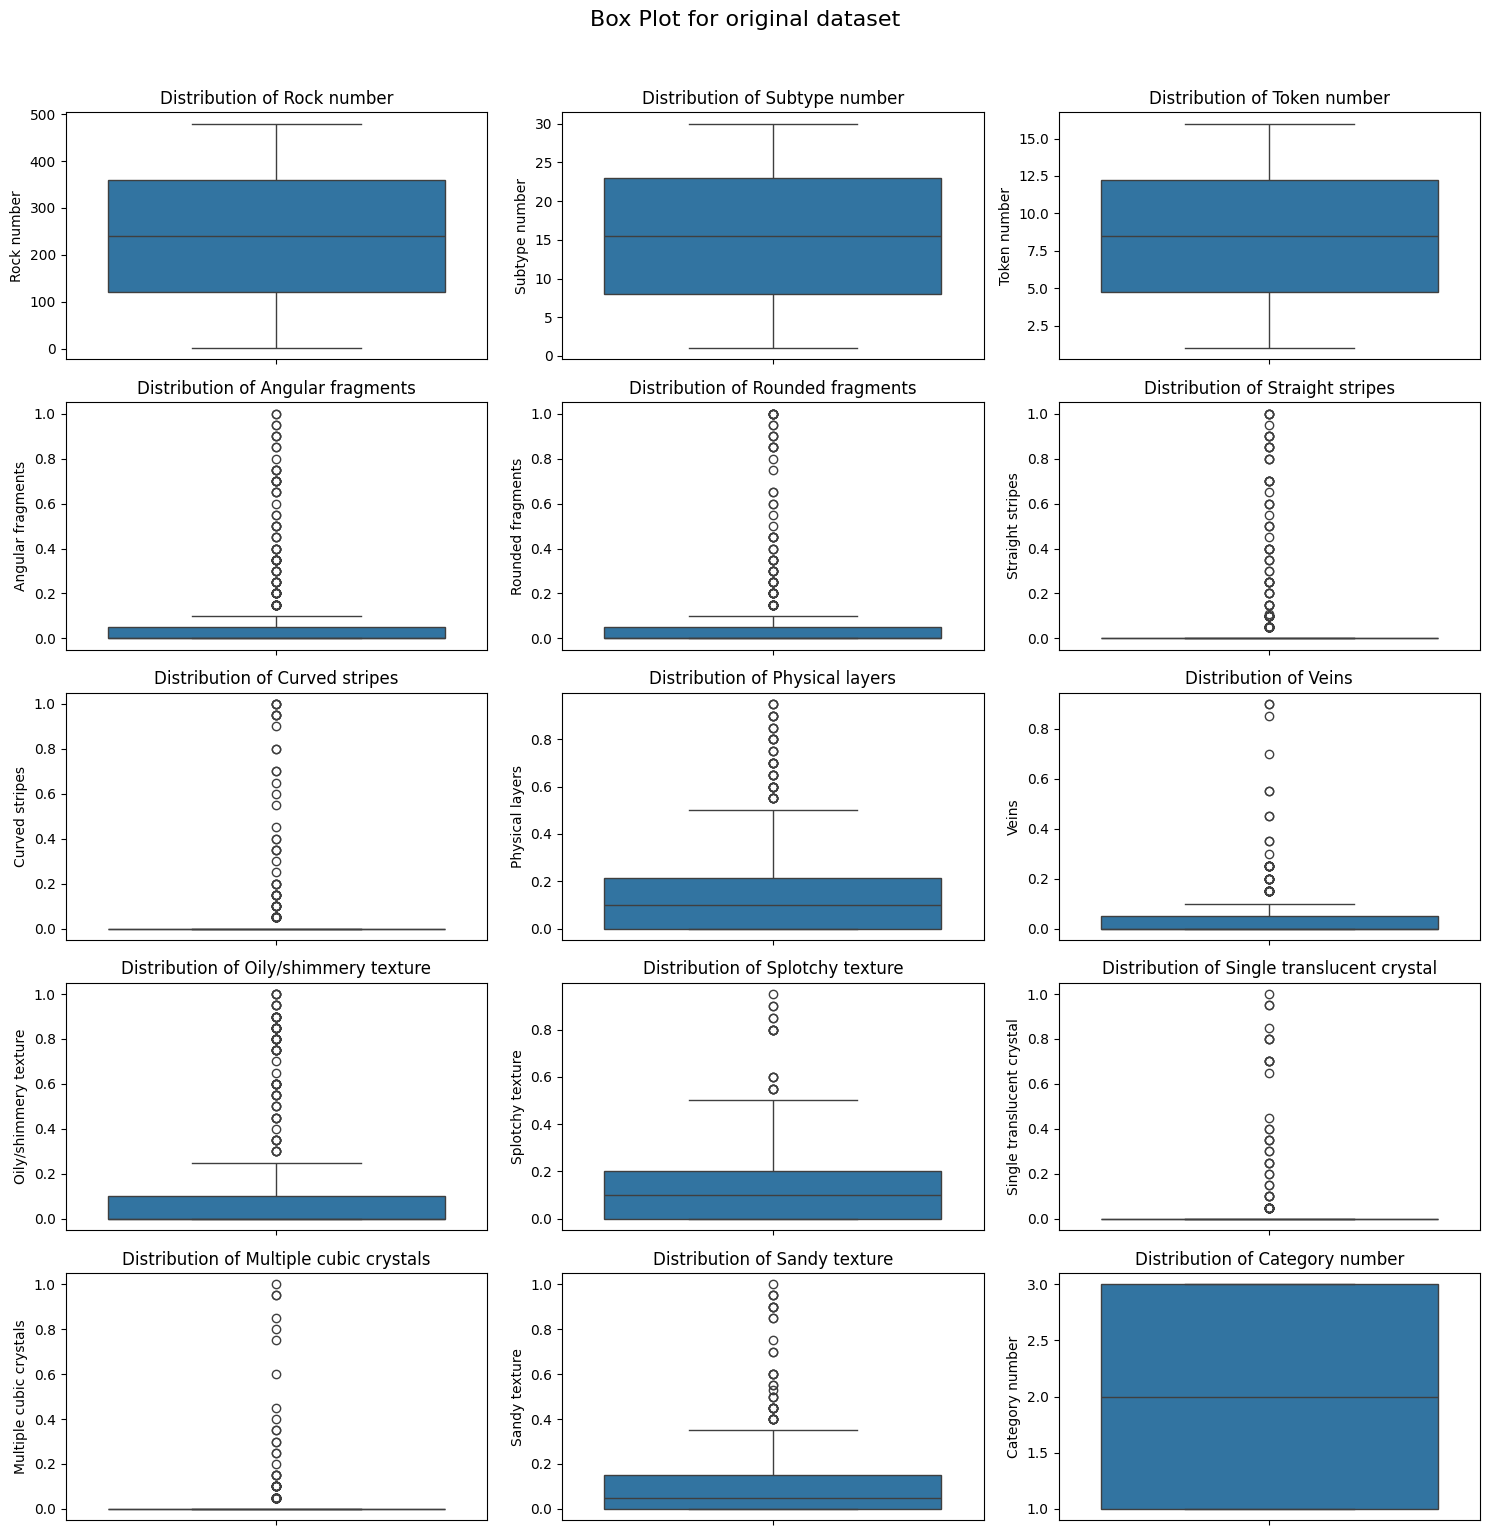

In [ ]:
def create_box_plot(df, title):
  numeric_cols = df.select_dtypes(include=[np.number]).columns
  n_cols = len(numeric_cols)
  n_rows = int(np.ceil(n_cols / 3))

  fig, axes = plt.subplots(n_rows, 3,
                              figsize=(15, 15),
                              squeeze=False)

  fig.suptitle(title,fontsize=16, y=1.02)

  axes_flat = axes.flatten()

  for idx, col in enumerate(numeric_cols):
          sns.boxplot(data=df, y=col, ax=axes_flat[idx])
          axes_flat[idx].set_title(f'Distribution of {col}')
          axes_flat[idx].set_ylabel(col)

  plt.tight_layout()
  plt.show()


create_box_plot(original_df, 'Box Plot for original dataset')


**Plotting Box Plot for Filtered DF by handling outlieres**

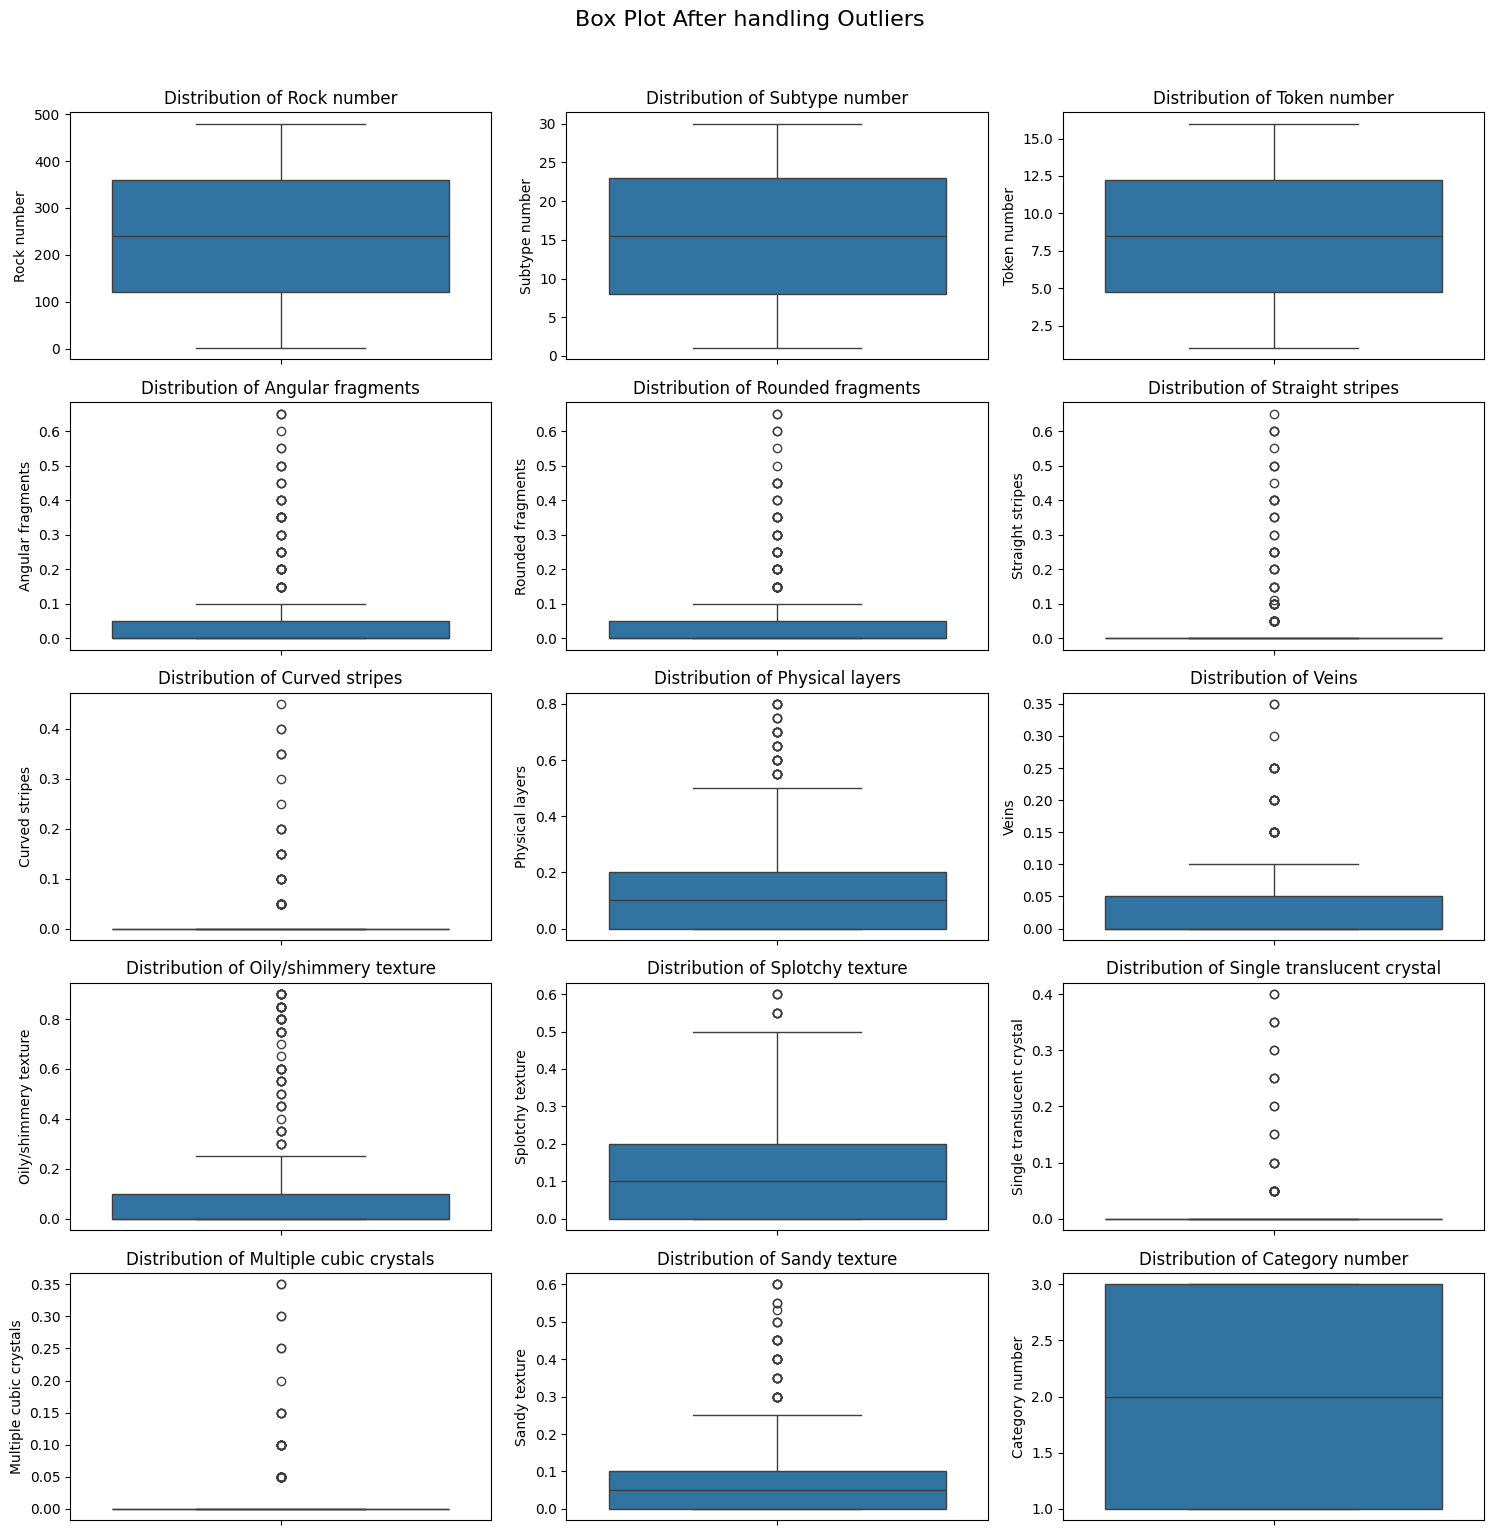

In [ ]:
# Box plot
create_box_plot(rock_df.iloc[:,:15], "Box Plot After handling Outliers")

In [ ]:
# Since we have removed the outliers, check for null value again
rock_df.isnull().sum()


,0
Rock number,0
Subtype number,0
Token number,0
Angular fragments,20
Rounded fragments,18
Straight stripes,21
Curved stripes,16
Physical layers,10
Veins,8
Oily/shimmery texture,8


In [9]:
# There are now Null values, let's drop those value so that it won't affect our training
rock_df.dropna(inplace=True)

# Dropping extra columns of z-score
rock_df.drop(columns= rock_df.columns[15:], inplace = True, axis=1)

rock_df.shape

(335, 15)

**Inference**

After Complete Outlier Removal and Null values removal, we have total 335 observations left for the training

### **2. Data Correlation**

#### **Correlation between data attributes**

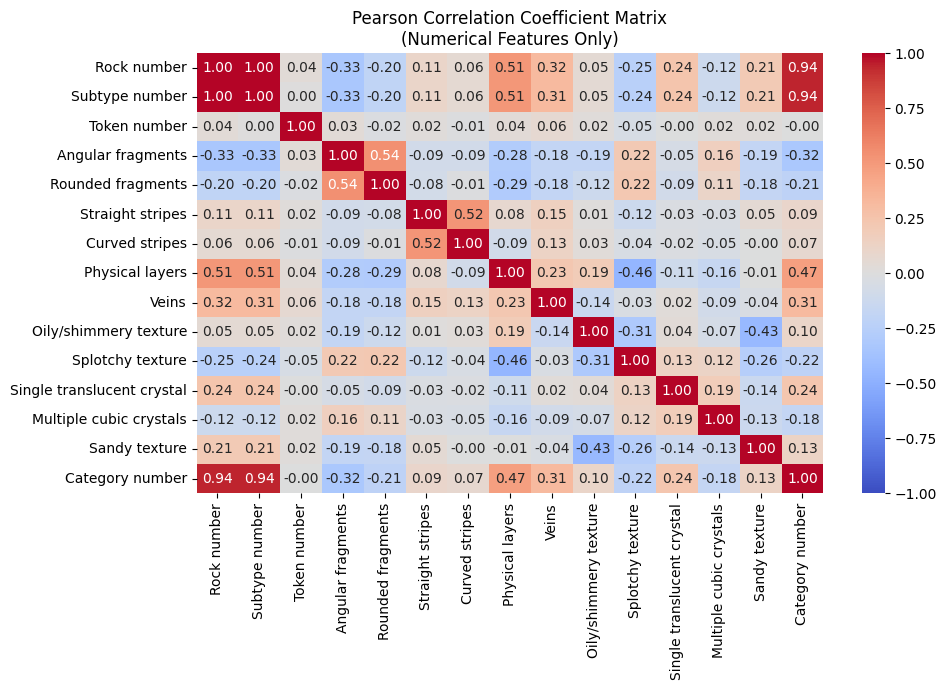

In [ ]:
# Calculate the correlation matrix
corr_matrix = rock_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Pearson Correlation Coefficient Matrix\n(Numerical Features Only)')
plt.tight_layout()
plt.show()

In [ ]:
# Finding Strong Correlation with threshold of 0.3 for Life Ladder
strong_corr = []

for j in range(len(rock_df.columns)):
        corr = corr_matrix.iloc[14,j]
        if abs(corr) >= 0.3:
            strong_corr.append({
                'var1': rock_df.columns[14],
                'var2': rock_df.columns[j],
                'correlation': corr,
            })
strong_corr.sort(key=lambda x: abs(x['correlation']), reverse=True)
strong_corr

[{'var1': 'Category number', 'var2': 'Category number', 'correlation': 1.0},
 {'var1': 'Category number',
  'var2': 'Subtype number',
  'correlation': 0.9408546299883292},
 {'var1': 'Category number',
  'var2': 'Rock number',
  'correlation': 0.9402405510662986},
 {'var1': 'Category number',
  'var2': 'Physical layers',
  'correlation': 0.47275778792921064},
 {'var1': 'Category number',
  'var2': 'Angular fragments',
  'correlation': -0.32097483874095045},
 {'var1': 'Category number',
  'var2': 'Veins',
  'correlation': 0.31432082665141353}]

#### **Correlation Between Attributes: Scatter Plot**

In [ ]:
sns.pairplot(rock_df)

plt.show()

### **3. Creating Training, Validation and Test Dataset**

 For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16
 token numbers).

In [10]:
# Training set
rock_df_train = rock_df[rock_df['Token number'].isin(range(1,11))]

# Validation set
rock_df_validation = rock_df[rock_df['Token number'].isin(range(11,14))]

# Test set
rock_df_test = rock_df[rock_df['Token number'].isin(range(14,17))]

print("Shape of Training set", rock_df_train.shape)
print("Shape of Validation set", rock_df_validation.shape)
print("Shape of Test set", rock_df_test.shape)

Shape of Training set (212, 15)
Shape of Validation set (64, 15)
Shape of Test set (59, 15)


In [ ]:
def checking_range(df, name):
  if name == "Training dataset":
      in_range = df['Token number'].between(1, 10)

  elif name == "Validation dataset":
      in_range = df['Token number'].between(11, 13)

  else:
      in_range = df['Token number'].between(14, 16)

  if in_range.all():
    print(f"All token numbers for {name} are within the range")
  else:
    print(f"Some token numbers for {name} are out of the range")

checking_range(rock_df_train, "Training dataset")
checking_range(rock_df_validation, "Validation dataset")
checking_range(rock_df_test, "Test dataset")

All token numbers for Training dataset are within the range
All token numbers for Validation dataset are within the range
All token numbers for Test dataset are within the range


In [11]:
# Creating Features and Targets
X_train = rock_df_train.iloc[:, 3:14]
Y_train = rock_df_train.iloc[:, -1]

X_val = rock_df_validation.iloc[:, 3:14]
Y_val = rock_df_validation.iloc[:, -1]

X_test = rock_df_test.iloc[:, 3:14]
Y_test = rock_df_test.iloc[:, -1]


**Checking Classes Distribution in Training Dataset**

In [ ]:
print("Class distribution in Training Set", Y_train.value_counts())

Class distribution in Training Set Category number
1    88
2    69
3    55
Name: count, dtype: int64


**Observation**

Since the classes are not evenly distributed but still we have enough observations for each class

### **4. Training different Classifiers**

In [64]:
def evaluate_model(results, algorithm, y_pred_train, y_pred_val):
  results = pd.concat([results, pd.DataFrame([{
            "algorithm": algorithm,
            "dataset": "Train",
            "Accuracy": accuracy_score(y_true= Y_train, y_pred = y_pred_train),
            "Precision": precision_score(y_true= Y_train, y_pred = y_pred_train, average = "macro"),
            "Recall": recall_score(y_true= Y_train, y_pred = y_pred_train, average = "macro"),
            "F1- score": f1_score(y_true= Y_train, y_pred = y_pred_train, average = "macro")}])], ignore_index=True )

  results = pd.concat([results, pd.DataFrame([{
              "algorithm": algorithm,
              "dataset": "Validation",
              "Accuracy": accuracy_score(y_true= Y_val, y_pred = y_pred_val),
              "Precision": precision_score(y_true= Y_val, y_pred = y_pred_val, average = "macro"),
              "Recall": recall_score(y_true= Y_val, y_pred = y_pred_val, average = "macro"),
              "F1- score": f1_score(y_true= Y_val, y_pred = y_pred_val, average = "macro")}])], ignore_index=True )

  return results

#### **Multinomial Logistic Regression (Softmax Regression)**

In [65]:
# Training a simple Model
softmax_reg = LogisticRegression(C= 200, random_state=42, solver= 'newton-cg', max_iter = 100)
softmax_reg.fit(X_train, Y_train)

# Predicting
y_pred_val = softmax_reg.predict(X_val)

# Accuracy Score
accuracy_softmax = accuracy_score(y_pred= y_pred_val, y_true= Y_val)
print("Accuracy Score for Softmax Regression or Multinomial Logistic Regression is", accuracy_softmax)

Accuracy Score for Softmax Regression or Multinomial Logistic Regression is 0.75


 **Grid Search CV - Hyperparameter Tuning C, solver, max number of iterations**

In [ ]:
param_grid_softmax = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Solvers that support 'multinomial'
    'max_iter': [50, 100, 200, 300]
}

np.random.seed(42)

random_search_softmax = RandomizedSearchCV(estimator=LogisticRegression(random_state=42), param_distributions=param_grid_softmax,
                                   n_iter=300, cv=10, verbose=2, random_state=42, n_jobs=-1, scoring = 'accuracy')

random_search_softmax.fit(X_train, Y_train)

print("Best parameters found: ", random_search_softmax.best_params_)

y_pred_val = random_search_softmax.predict(X_val)

accuracy_grid_soft = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for Softmax Regression GridCV", accuracy_grid_soft)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best parameters found:  {'solver': 'newton-cg', 'max_iter': 50, 'C': 200}
Best Score found:  0.6051948051948053
Accuracy Score for Softmax Regression GridCV 0.75


**Impact of Hyperparameters**

1. The hyperparameters which were tuned for RandomizedSearch CV are as follows:

  C: inverse of Regularization Strength

  solver: Algorithm to use in the optimization (only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss)

  max-iter: Maximum number of iterations taken for the solvers to converge

2. After performing Randomized search we couldn't find a higher accuracy than 75%.

3. Thus the final selected hyperparameters are: C= 200, 'solver'= 'newton-cg', 'max_iter': 50

**Evaluation on Validation set**

In [66]:
results = pd.DataFrame()

# Using the best parameters from Grid Search CV and training model
softmax_reg_model = LogisticRegression(C= 200, max_iter= 50, solver= 'newton-cg', random_state = 42)

softmax_reg_model.fit(X_train, Y_train)

y_pred_val = softmax_reg_model.predict(X_val)

y_pred_train = softmax_reg_model.predict(X_train)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, algorithm = 'Softmax Regression')

results.head()

,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538


In [18]:
#function for confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, dataset_name):
  cm = confusion_matrix(y_true=y_true, y_pred= y_pred)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Igneous', 'Metamorphic', 'Sedimentary'],
            yticklabels=['Igneous', 'Metamorphic', 'Sedimentary'])
  plt.title(f'Confusion Matrix {model_name} on {dataset_name}')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()


**Confusion Matrix on Validation Set**

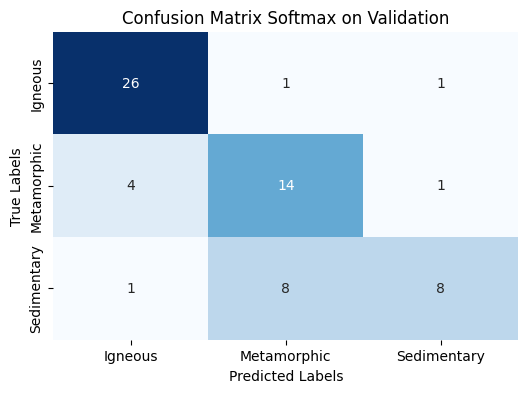

In [19]:
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="Softmax", dataset_name="Validation")

**Inference From Softmax Regression Model**

1. Correctly Classified Igneous Rocks = 26
2. Correctly Classified Metamorphic Rocks = 14
3. Correctly Classified sedimentary Rocks = 8
4. Precision = 74% and Recall = 71%
3. Accuracy achieved by Softmax Regression model is 75%
4. Both accuracy and precision are higher.

 #### **Support Vector Machine**

In [67]:
#Model Intialization
svm_clf = SVC(kernel="poly", degree= 2, gamma = 'scale', C= 10,  random_state=42, probability=True)

#Training
svm_clf.fit(X_train, Y_train)

# Predicting
y_pred_val = svm_clf.predict(X_val)

# Accuracy Score
accuracy_svm = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for SVM is", accuracy_svm)
print("Support vectors are \n", svm_clf.support_vectors_)


Accuracy Score for SVM is 0.78125
Support vectors are 
 [[0.2  0.15 0.   ... 0.   0.   0.1 ]
 [0.65 0.5  0.   ... 0.   0.   0.05]
 [0.   0.   0.   ... 0.   0.   0.2 ]
 ...
 [0.   0.   0.05 ... 0.   0.   0.05]
 [0.   0.   0.   ... 0.   0.   0.15]
 [0.   0.   0.   ... 0.   0.   0.1 ]]


**Grid Search CV - Hyperparameter Tuning:  C, kernel, degree of polynomial kernel, gamma**

In [ ]:
from scipy.stats import uniform

param_grid_svm = {
    'C': uniform(0.1, 1000),
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.01, 0.001,0.0001]
}

np.random.seed(42)

random_search_svc = RandomizedSearchCV(estimator=SVC(random_state = 42), param_distributions= param_grid_svm,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring = 'accuracy')

random_search_svc.fit(X_train, Y_train)

print("Best Parameters: ", random_search_svc.best_params_)
print("Best Score: ", random_search_svc.best_score_)

y_pred_val = random_search_svc.predict(X_val)

accuracy_grid_svm = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for SVM Classification GridCV", accuracy_grid_svm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'C': 100.07491581800288, 'degree': 4, 'gamma': 0.0001, 'kernel': 'linear'}
Best Score:  0.5526024363233666
Accuracy Score for SVM Classification GridCV 0.734375


 **Impact of Hyperparameters**  

1. The hyperparameters used here for tuning are:

    C: Regularization parameter

    Kernel:  kernel type to be used in the algorithm

    Degree: Degree of the polynomial kernel function (for 'poly' kernel)

    Gamma:  Kernel coefficient

2. Inference from hyperparameter tuning is that our own given manual values of the parameters resulted in higher accuracy than that searched by randomized search CV, This can be due to CV folds and missing that one grid point where accuracy is higher.

3. Selected Hyperparameters are kernel="poly", degree= 2, gamma = 'scale', C= 10,  random_state=42

 **Evaluation on Validation set**

In [68]:
#Predicting
y_pred_val = svm_clf.predict(X_val)

y_pred_train = svm_clf.predict(X_train)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, algorithm = 'SVC')
results


,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538
2,SVC,Train,0.740566,0.727651,0.716820,0.719423
3,SVC,Validation,0.781250,0.746853,0.743513,0.742671


**Confusion Matrix on Validation Set**

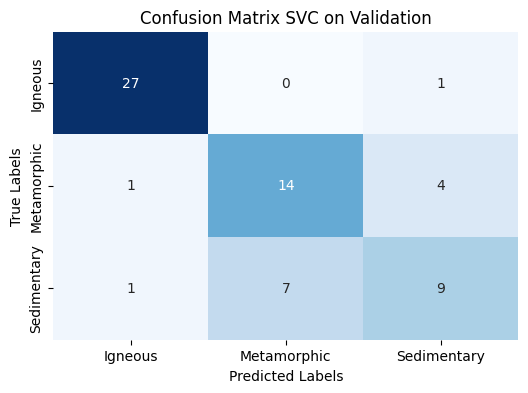

In [22]:
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="SVC", dataset_name="Validation")

**Inference From Support Vector Classification Model**

1. Correctly Classified Igneous Rocks = 27
2. Correctly Classified Metamorphic Rocks = 14
3. Correctly Classified sedimentary Rocks = 9
4. Precision = 75% and Recall = 71%
3. Accuracy achieved by SVM model is 78%
4. Accuracy is higher than that of softmax model.

#### **Random Forest classifier**

In [69]:
#Model Initialization
rnd_clf = RandomForestClassifier(max_depth = 5, n_estimators = 50, min_samples_split= 5, min_samples_leaf = 2 ,random_state=42)

#Training
rnd_clf.fit(X_train, Y_train)

# Predicting
y_pred_val = rnd_clf.predict(X_val)

# Accuracy Score
accuracy_rnd = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for Random Forest Classifier is", accuracy_rnd)
print("Feature importance in the Random Forest \n", rnd_clf.feature_importances_)
print("Feature Names in the Random Forest \n", rnd_clf.feature_names_in_)

Accuracy Score for Random Forest Classifier is 0.734375
Feature importance in the Random Forest 
 [0.10196423 0.06007518 0.09131254 0.0314925  0.20370474 0.07425136
 0.0941398  0.11392093 0.09007924 0.06082207 0.0782374 ]
Feature Names in the Random Forest 
 ['Angular fragments' 'Rounded fragments' 'Straight stripes'
 'Curved stripes' 'Physical layers' 'Veins' 'Oily/shimmery texture'
 'Splotchy texture' 'Single translucent crystal' 'Multiple cubic crystals'
 'Sandy texture']


**Observation**

We can observe that the highest feature importance value is given to the feature "Physical layers"

**Grid Search CV - Hyperparameter Tuning:  the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node**

In [135]:
param_grid_rnd = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

random_search_rnd = RandomizedSearchCV(estimator= RandomForestClassifier(random_state=42), param_distributions= param_grid_rnd,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring = 'accuracy')
random_search_rnd.fit(X_train, Y_train)

print("Best Parameters: ", random_search_rnd.best_params_)
print("Best Score: ", random_search_rnd.best_score_)

y_pred_val = random_search_rnd.predict(X_val)

accuracy_grid_rnd = accuracy_score(y_pred= y_pred_val, y_true= Y_val)

print("Accuracy Score for Random Classification GridCV", accuracy_grid_rnd)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Best Score:  0.5475083056478406
Accuracy Score for Random Classification GridCV 0.734375


**Impact of Hyperparameters**

1. The hyperparameters used in tuning:

    n_estimators: Number of trees in the forest

    max_depth: Maximum depth of the trees

    min_samples_split: Minimum number of samples required to split an internal node

    min_samples_leaf: Minimum number of samples required to be at a leaf node

2. We could not find a much more better parameters than one we manually tried thus the final parameters for our model are:
max_depth = 5, n_estimators = 50, min_samples_split= 5, min_samples_leaf = 2


**Evaluation on Validation set**

In [70]:
y_pred_val = rnd_clf.predict(X_val)

y_pred_train = rnd_clf.predict(X_train)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, algorithm = 'Random Forest')

results


,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538
2,SVC,Train,0.740566,0.727651,0.716820,0.719423
3,SVC,Validation,0.781250,0.746853,0.743513,0.742671
4,Random Forest,Train,0.816038,0.830904,0.798177,0.808454
5,Random Forest,Validation,0.734375,0.751478,0.688818,0.695451


**Confusion Matrix on Validation Set**

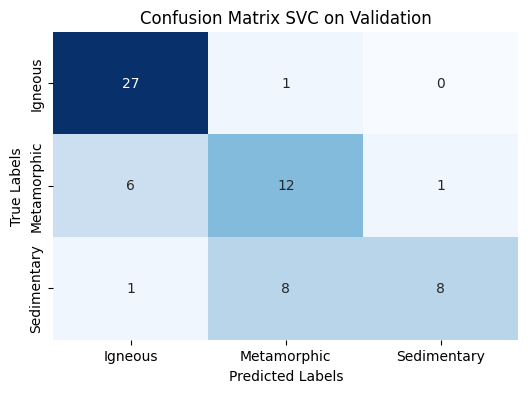

In [25]:
plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="SVC", dataset_name="Validation")

**Inference From Random Forest Classification Model**

1. Correctly Classified Igneous Rocks = 27
2. Correctly Classified Metamorphic Rocks = 12
3. Correctly Classified sedimentary Rocks = 8
4. Precision = 75% and Recall = 68%
3. Accuracy achieved by Random Forest model is 73%
4. Recall and accuracy are lower than both the softmax and svm models

### **5. Ensemble Model**

#### **Voting Classfier - Hard Voting**

In [71]:
from sklearn.ensemble import VotingClassifier

#Using the three generated best models based on hyperparameter tuning
hard_voting_clf = VotingClassifier(estimators=[
    ('svc', svm_clf),
    ('rf', rnd_clf),
    ('softmax', softmax_reg_model)
], voting='hard' )

# Training
hard_voting_clf.fit(X_train, Y_train)

# Predicting
y_pred_val = hard_voting_clf.predict(X_val)

y_pred_train = hard_voting_clf.predict(X_train)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, algorithm = 'Hard Voting Classifier')
results

,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538
2,SVC,Train,0.740566,0.727651,0.716820,0.719423
3,SVC,Validation,0.781250,0.746853,0.743513,0.742671
4,Random Forest,Train,0.816038,0.830904,0.798177,0.808454
5,Random Forest,Validation,0.734375,0.751478,0.688818,0.695451
6,Hard Voting Classifier,Train,0.750000,0.745118,0.728755,0.733563
7,Hard Voting Classifier,Validation,0.765625,0.760038,0.723905,0.725173


**Observation:**

1. We observe that the ensemble model does not surpass the individual SVC model.
2. The accuracy achieved by Hard voting Classifier is 76% which is lower than SVC model but the precision is 76% which is higher than all other models.
3. Although Hard voting classifier do surpass the individual Softmax and Random Forest Classifier.

#### **Voting Classifier: Soft Voting**

In [72]:
soft_voting_clf = VotingClassifier(estimators=[
    ('svc', svm_clf),
    ('rf', rnd_clf),
    ('softmax', softmax_reg_model)
], voting='soft')

# setting probabilty true for svc
soft_voting_clf.named_estimators["svc"].probability = True

soft_voting_clf.fit(X_train, Y_train)

# Predicting
y_pred_val = soft_voting_clf.predict(X_val)

y_pred_train = soft_voting_clf.predict(X_train)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, algorithm = 'Soft Voting Classifier')
results



,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538
2,SVC,Train,0.740566,0.727651,0.716820,0.719423
3,SVC,Validation,0.781250,0.746853,0.743513,0.742671
4,Random Forest,Train,0.816038,0.830904,0.798177,0.808454
5,Random Forest,Validation,0.734375,0.751478,0.688818,0.695451
6,Hard Voting Classifier,Train,0.750000,0.745118,0.728755,0.733563
7,Hard Voting Classifier,Validation,0.765625,0.760038,0.723905,0.725173
8,Soft Voting Classifier,Train,0.745283,0.744412,0.719005,0.724775
9,Soft Voting Classifier,Validation,0.765625,0.747917,0.725969,0.729119


**Observation:**

1. The accuracy and precision of Soft Voting does not surpass hard voting classifier and remains at 76% and 74% respectively


#### **Stacking**

In [77]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

meta_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, random_state=42, max_depth= 5)

np.random.seed(42)

stacking_clf = StackingClassifier(
    estimators=[
        ('svc', svm_clf),
        ('rf', rnd_clf),
        ('softmax', softmax_reg_model)
    ],
    final_estimator= meta_model,
    cv = 5,
    stack_method='predict',
    n_jobs=-1,

)
stacking_clf.fit(X_train, Y_train)

# Predicting
y_pred_val = stacking_clf.predict(X_val)

y_pred_train = stacking_clf.predict(X_train)

results = evaluate_model(results, y_pred_train=y_pred_train, y_pred_val= y_pred_val, algorithm = 'Stacking Classifier')
results


,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538
2,SVC,Train,0.740566,0.727651,0.716820,0.719423
3,SVC,Validation,0.781250,0.746853,0.743513,0.742671
4,Random Forest,Train,0.816038,0.830904,0.798177,0.808454
5,Random Forest,Validation,0.734375,0.751478,0.688818,0.695451
6,Hard Voting Classifier,Train,0.750000,0.745118,0.728755,0.733563
7,Hard Voting Classifier,Validation,0.765625,0.760038,0.723905,0.725173
8,Soft Voting Classifier,Train,0.745283,0.744412,0.719005,0.724775
9,Soft Voting Classifier,Validation,0.765625,0.747917,0.725969,0.729119


**Observation**

1. Stacking has resulted in highest accuracy and highest precision
2. We have used gradientboosting for non linear data

**Confusion Matrix on Validation set**

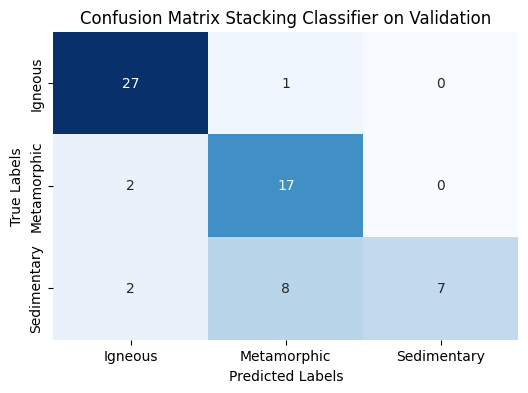

In [53]:
y_pred_val = stacking_clf.predict(X_val)

plot_confusion_matrix(y_true=Y_val, y_pred= y_pred_val, model_name="Stacking Classifier", dataset_name="Validation")

**Inference from Final model**

1. Correctly Classified Igneous Rocks = 27
2. Correctly Classified Metamorphic Rocks = 17
3. Correctly Classified sedimentary Rocks = 7
4. Precision = 84% and Recall = 75%
3. Accuracy achieved by our best model Stacking Classifier is 80%
4. Both accuracy and precision are higher than every other model

**Final Evaluation on Test set using best evaluated Validation set**

In [78]:
y_pred_test = stacking_clf.predict(X_test)

results = pd.concat([results, pd.DataFrame([{
            "algorithm": "Stacking Classifier",
            "dataset": "Test",
            "Accuracy": accuracy_score(y_true= Y_test, y_pred = y_pred_test),
            "Precision": precision_score(y_true= Y_test, y_pred = y_pred_test, average = "macro"),
            "Recall": recall_score(y_true= Y_test, y_pred = y_pred_test, average = "macro"),
            "F1- score": f1_score(y_true= Y_test, y_pred = y_pred_test, average = "macro")}])], ignore_index=True )

print("Results Dataframe \n")
results

Results Dataframe 



,algorithm,dataset,Accuracy,Precision,Recall,F1- score
0,Softmax Regression,Train,0.683962,0.667165,0.661232,0.663051
1,Softmax Regression,Validation,0.750000,0.749135,0.712001,0.713538
2,SVC,Train,0.740566,0.727651,0.716820,0.719423
3,SVC,Validation,0.781250,0.746853,0.743513,0.742671
4,Random Forest,Train,0.816038,0.830904,0.798177,0.808454
5,Random Forest,Validation,0.734375,0.751478,0.688818,0.695451
6,Hard Voting Classifier,Train,0.750000,0.745118,0.728755,0.733563
7,Hard Voting Classifier,Validation,0.765625,0.760038,0.723905,0.725173
8,Soft Voting Classifier,Train,0.745283,0.744412,0.719005,0.724775
9,Soft Voting Classifier,Validation,0.765625,0.747917,0.725969,0.729119


**Confusion Matrix on Test set**

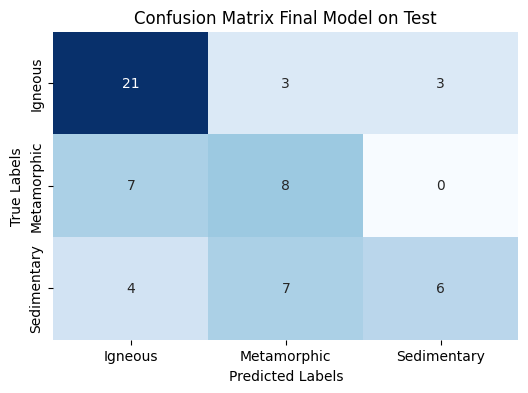

In [57]:
plot_confusion_matrix(y_true=Y_test, y_pred= y_pred_test, model_name="Final Model", dataset_name="Test")

#### **Observation on Test dataset**

1. After performing several machine learning algorithms for validation set, the accuracy for test set with the best model is 59.32%
2. Correctly Classified Igneous Rocks = 21
2. Correctly Classified Metamorphic Rocks = 8
3. Correctly Classified sedimentary Rocks = 6
4. Precision = 59% and Recall = 55%



**Saving Final Model**

In [58]:
import pickle
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(stacking_clf, file)

### **6. Comparison of final Model with Human testing**

In [60]:
trial_df = trial_df[(trial_df['rocknumber'] >= 1) & (trial_df['rocknumber'] <= 480)]
trial_df

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88541,A2FXYZE13N65FJ,4,1075,247,Metamorphic,Migmatite,7,NonparentTraining,Metamorphic,Yes,1,1.0
88542,A2FXYZE13N65FJ,4,1076,366,Sedimentary,Chert,14,StandardTransfer,Sedimentary,No,1,1.0
88543,A2FXYZE13N65FJ,4,1077,412,Sedimentary,Micrite,12,StandardTransfer,Sedimentary,No,1,1.0
88544,A2FXYZE13N65FJ,4,1078,476,Sedimentary,Shale,12,NonparentTraining,Metamorphic,Yes,0,1.0


In [92]:
trial_df[trial_df['rocknumber'] == 19]

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
236,A1HUMXQ7SEXD8E,2,237,19,Igneous,Basalt,3,NonparentTraining,Igneous,NaN,1,NaN
489,A1HUMXQ7SEXD8E,3,490,19,Igneous,Basalt,3,NonparentTraining,Igneous,NaN,1,NaN
780,A1HUMXQ7SEXD8E,4,781,19,Igneous,Basalt,3,NonparentTraining,Igneous,Yes,1,1.0
1206,A3RJK6ZDXHN0IG,1,127,19,Igneous,Basalt,3,NonparentTraining,Metamorphic,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87030,A1YV3RN46QYQ9N,4,638,19,Igneous,Basalt,3,NonparentTraining,Metamorphic,No,0,0.0
87581,A2FXYZE13N65FJ,1,115,19,Igneous,Basalt,3,NonparentTraining,Igneous,NaN,1,NaN
87789,A2FXYZE13N65FJ,2,323,19,Igneous,Basalt,3,NonparentTraining,Igneous,NaN,1,NaN
87905,A2FXYZE13N65FJ,3,439,19,Igneous,Basalt,3,NonparentTraining,Igneous,NaN,1,NaN


#### 6.1 **Computing the Train and Test Accuracy of Human Data**

In [61]:
trial_df_train = trial_df[trial_df['block'].isin([1,2,3])]

print("Shape of training dataset is",trial_df_train.shape)

trial_df_test = trial_df[trial_df['block'] == 4]
print("Shape of test dataset is",trial_df_test.shape)


Shape of training dataset is (44273, 12)
Shape of test dataset is (39354, 12)


**Human Train Set Accuracy**

In [62]:
correct_train_detection = trial_df_train['cat_correct'].sum()
total_train_rocks = trial_df_train['cat_correct'].count()
accuracy_human_train = correct_train_detection / total_train_rocks
print(f"Total number of rocks correctly detected in training set {correct_train_detection}")
print(f"Total number of rocks present in training set {total_train_rocks}")
print(f"Accuracy of human Classification on Training set {accuracy_human_train * 100:.2f}%")

Total number of rocks correctly detected in training set 24790
Total number of rocks present in training set 44273
Accuracy of human Classification on Training set 55.99%


**Human Test Set Accuracy**

In [63]:
correct_test_detection = trial_df_test['cat_correct'].sum()
total_test_rocks = trial_df_test['cat_correct'].count()
accuracy_human_test = correct_test_detection / total_test_rocks
print(f"Total number of rocks correctly detected in test set {correct_test_detection}")
print(f"Total number of rocks present in test set {total_test_rocks}")
print(f"Accuracy of human Classification on Test set {accuracy_human_test * 100:.2f}%")

Total number of rocks correctly detected in test set 23550
Total number of rocks present in test set 39354
Accuracy of human Classification on Test set 59.84%


**Observation**

1. The accuracy of our best model is 59.32% on test dataset which is lesser than the accuracy of human test dataset that is 59.84%

2. The accuracy of our best model is 73% on train dataset which is higher than the accuracy of human train dataset that is 55.99%

3. So overall there is not a very big difference between the test dataset accuracy of Human data and that of our model, since our validation set data has resulted in accuracy of around 80% and precision of around 84%.

4. To conclude, our model has performed well on training and validation set as compared to the Human Accuracy but could not perform higher than the Human accuracy on Test dataset.

5. One of the reason can be that due to less data points our model is not trained accurately.

#### 6.2 **Average human accuracy and standard deviation on whole dataset**

Average human accuracy is calculating the accuracy per category

In [79]:
grouped = trial_df.groupby('category')
accuracy_per_category = grouped['cat_correct'].mean()
average_accuracy = accuracy_per_category.mean()
std_deviation = accuracy_per_category.std()

print("Accuracy accross group",accuracy_per_category )
print(f"Average human Accuracy  {average_accuracy * 100:.2f}%")
print(f'Standard Deviation: {std_deviation}')

Accuracy accross group category
Igneous        0.621368
Metamorphic    0.530439
Sedimentary    0.582323
Name: cat_correct, dtype: float64
Average human Accuracy  57.80%
Standard Deviation: 0.045614879831314244


#### 6.3 **Plot between Average Human Accuracy and Model Probability**


In [115]:
# Calculate the average human accuracy per rock
human_accuracy_avg = trial_df.groupby(['rocknumber', 'category'])['cat_correct'].mean().reset_index()
human_accuracy_avg.columns = ['rock_number','category', 'avg_human_accuracy']
human_accuracy_avg

,rock_number,category,avg_human_accuracy
0,1,Igneous,0.746951
1,2,Igneous,0.719512
2,3,Igneous,0.451220
3,4,Igneous,0.500000
4,5,Igneous,0.512195
...,...,...,...
475,476,Sedimentary,0.576220
476,477,Sedimentary,0.524390
477,478,Sedimentary,0.426829
478,479,Sedimentary,0.365854


In [134]:
#calculating model probability
original_df_features = original_df.iloc[:,3:14]
original_df_target = original_df.iloc[:,-1]
model_probabilities = stacking_clf.predict_proba(original_df_features)

list_model_prob = []
for i in model_probabilities:
  #finding maximum probability for each index
   list_model_prob.append(i.max())

list_model_prob[1:6]

[0.6814276605564258,
 0.6814276605564258,
 0.5446170700122072,
 0.7675946167128065,
 0.6814276605564258]

In [128]:
model_probabilities_df = pd.DataFrame({
    'rock_number': range(1, 481),  # Generate rock IDs from 1 to 480
    'model_probability': list_model_prob
})

model_probabilities_df.head()

,rock_number,model_probability
0,1,0.681428
1,2,0.681428
2,3,0.681428
3,4,0.544617
4,5,0.767595


In [129]:
#merging both the datasets of human accuracy and model probability
human_model_df = pd.merge(human_accuracy_avg, model_probabilities_df, on= 'rock_number' )
human_model_df.head()

,rock_number,category,avg_human_accuracy,model_probability
0,1,Igneous,0.746951,0.681428
1,2,Igneous,0.719512,0.681428
2,3,Igneous,0.451220,0.681428
3,4,Igneous,0.500000,0.544617
4,5,Igneous,0.512195,0.767595
...,...,...,...,...
475,476,Sedimentary,0.576220,0.388430
476,477,Sedimentary,0.524390,0.388430
477,478,Sedimentary,0.426829,0.409062
478,479,Sedimentary,0.365854,0.409062


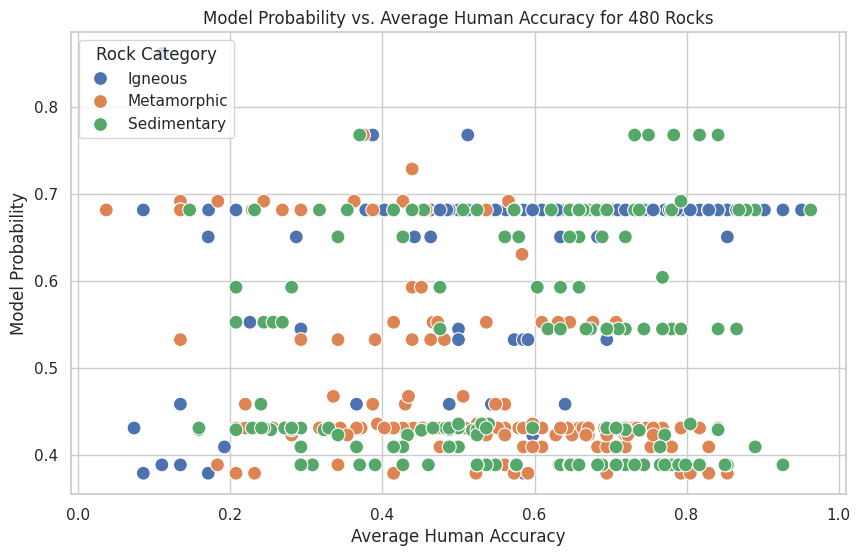

In [132]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data= human_model_df,
    x='avg_human_accuracy',
    y='model_probability',
    hue='category',
    s=100,
)

# Add labels and title
plt.xlabel("Average Human Accuracy")
plt.ylabel("Model Probability")
plt.title("Model Probability vs. Average Human Accuracy for 480 Rocks")
plt.legend(title="Rock Category")
plt.show()

#### 6.4  **Correlation coefficient between average human accuracies and model probabilities**


In [133]:
from scipy.stats import pearsonr

results = {}

# Step 1: Compute correlation and p-value for each category
for category in human_model_df['category'].unique():
    category_data = human_model_df[human_model_df['category'] == category]
    corr_coeff, p_value = pearsonr(category_data['avg_human_accuracy'], category_data['model_probability'])
    results[category] = {'correlation_coefficient': corr_coeff, 'p_value': p_value}

# Step 2: Compute correlation and p-value for all rocks
all_corr_coeff, all_p_value = pearsonr(human_model_df['avg_human_accuracy'], human_model_df['model_probability'])
results['all_rocks'] = {'correlation_coefficient': all_corr_coeff, 'p_value': all_p_value}

# Print results
for category, values in results.items():
    print(f"Category '{category}':")
    print(f"  Correlation coefficient: {values['correlation_coefficient']:.4f}")
    print(f"  p-value: {values['p_value']:.4e}")
    if values['p_value'] < 0.05:
        print("  Result: Significant correlation (p < 0.05)\n")
    else:
        print("  Result: Not significant (p >= 0.05)\n")


Category 'Igneous':
  Correlation coefficient: 0.3867
  p-value: 4.4035e-07
  Result: Significant correlation (p < 0.05)

Category 'Metamorphic':
  Correlation coefficient: -0.4432
  p-value: 4.3916e-09
  Result: Significant correlation (p < 0.05)

Category 'Sedimentary':
  Correlation coefficient: 0.1200
  p-value: 1.3068e-01
  Result: Not significant (p >= 0.05)

Category 'all_rocks':
  Correlation coefficient: 0.1350
  p-value: 3.0407e-03
  Result: Significant correlation (p < 0.05)



### **Conclusion**

1. To conclude our analysis we built a final model with ensembled classifier and found the difference in accuracy between Human and Machine Learning Model
2. According to our prediction, training and validation set worked quite well as compared to human training, but testing set does not resulted in higher accuracy.
3. More different approaches and GridsearchCV can be performed with more parameters values to achieve higher accuracy in individual model which can leads to further higher accuracy in ensembled model.
